# A pymc3 implementation of "Stan goes to the World Cup"

Basic reimplementation of the blog posts using `pymc3`

- https://andrewgelman.com/2014/07/13/stan-analyzes-world-cup-data/
- https://andrewgelman.com/2014/07/15/stan-world-cup-update/

In [2]:
import numpy as np
import pandas as pd

games = []
team_ids = {}
id_ = 0
with open('worldcup2012.txt') as f:
    for game_id, line in enumerate(f):
        team1, score1, team2, score2 = line.strip().split()
        if not team1 in team_ids:
            team_ids[team1] = id_
            id_ += 1
        if not team2 in team_ids:
            team_ids[team2] = id_
            id_ += 1
        score1, score2 = int(score1), int(score2)
        games.append({
            'game_id': game_id,
            'team1': team1,
            'team1_id': team_ids[team1],
            'score1': score1,
            'team2': team2,
            'team2_id': team_ids[team2],
            'score2': score2,
            'diff': np.sign(score1 - score2) * np.sqrt(np.abs(score1 - score2))
        })
id_to_team = {v: k for k, v in team_ids.items()}
df = pd.DataFrame(games)
df

,diff,game_id,score1,score2,team1,team1_id,team2,team2_id
0,1.414214,0,3,1,Bresil,0,Croatie,1
1,1.000000,1,1,0,Mexique,2,Cameroun,3
2,0.000000,2,0,0,Bresil,0,Mexique,2
3,-2.000000,3,0,4,Cameroun,3,Croatie,1
4,-1.732051,4,1,4,Cameroun,3,Bresil,0
5,-1.414214,5,1,3,Croatie,1,Mexique,2
6,-2.000000,6,1,5,Espagne,4,Pays-Bas,5
7,1.414214,7,3,1,Chili,6,Australie,7
8,-1.414214,8,0,2,Espagne,4,Chili,6
9,-1.000000,9,2,3,Australie,7,Pays-Bas,5


In [10]:
with open('soccerpowerindex.txt') as f:
    soccer_power_index = [L.strip() for L in f]
n_teams = len(soccer_power_index)
plot_order = {team: i for i, team in enumerate(reversed(soccer_power_index))}
prior_scores = {team: ((2*i)-n_teams)/n_teams for i, team in enumerate(reversed(soccer_power_index))}
prior_scores

{'Algerie': -0.9375,
 'Allemagne': 0.8125,
 'Angleterre': 0.4375,
 'Argentine': 0.875,
 'Australie': -1.0,
 'Belgique': 0.375,
 'Bosnie': 0.25,
 'Bresil': 0.9375,
 'Cameroun': -0.75,
 'Chili': 0.6875,
 'Colombie': 0.5625,
 'Coree': -0.5625,
 'CostaRica': -0.625,
 "Coted'Ivoire": 0.0625,
 'Croatie': -0.4375,
 'Equateur': 0.1875,
 'Espagne': 0.75,
 'Etats-Unis': -0.1875,
 'France': 0.625,
 'Ghana': -0.3125,
 'Grece': -0.375,
 'Honduras': -0.875,
 'Iran': -0.8125,
 'Italie': -0.0625,
 'Japon': -0.6875,
 'Mexique': -0.25,
 'Nigeria': -0.5,
 'Pays-Bas': 0.3125,
 'Portugal': 0.125,
 'Russie': 0.0,
 'Suisse': -0.125,
 'Uruguay': 0.5}

In [47]:
import theano.tensor as T
import pymc3 as pm

n_games = len(df)
n_teams = len(prior_scores)

prior_scores = np.array([prior_scores[team] for team, id_ in team_ids.items()])

game_team1 = df.team1_id
game_team2 = df.team2_id

score_diffs = df['diff']

def score_diff(s1, s2):
    d = s1 - s2
    return T.sgn(d) * T.sqrt(T.abs_(d))

with pm.Model() as model:
    b = pm.Normal('b', 0, 1)
    sigma_a = pm.HalfNormal('sigma_a', 1)
    abilities = pm.Normal('abilities', b*prior_scores, sigma_a, shape=n_teams)
    
    sigma_y = pm.HalfNormal('sigma_y', 1)
    y_mu = pm.Deterministic('y_mu', score_diff(abilities[game_team1], abilities[game_team2]))
    y = pm.Normal('y', y_mu, sigma_y, shape=n_games, observed=score_diffs)
    
    trace = pm.sample(500, model=model)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, abilities, sigma_a, b]
Sampling 2 chains: 100%|██████████| 2000/2

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d2edfd0>,
      dtype=object)

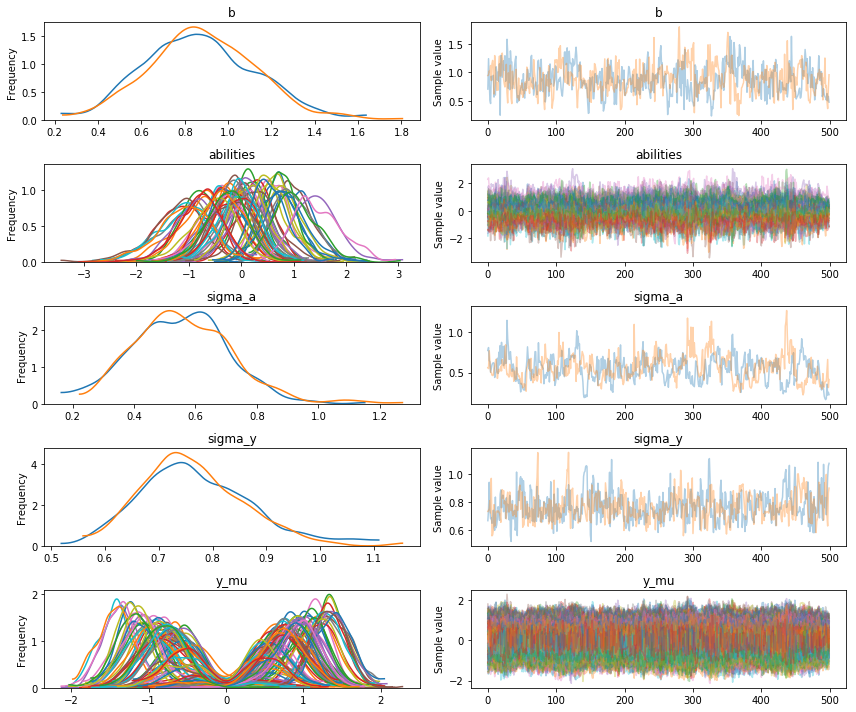

In [48]:
pm.plots.traceplot(trace)

In [49]:
sigma_a = trace['sigma_a'].mean()
estimated_abilities = (
    (id_to_team[id_], mean) for id_, mean in enumerate(trace['abilities'].mean(axis=0))
)
estimated_abilities = sorted(estimated_abilities, key=lambda x: plot_order[x[0]])

In [50]:
labels, values = zip(*estimated_abilities)

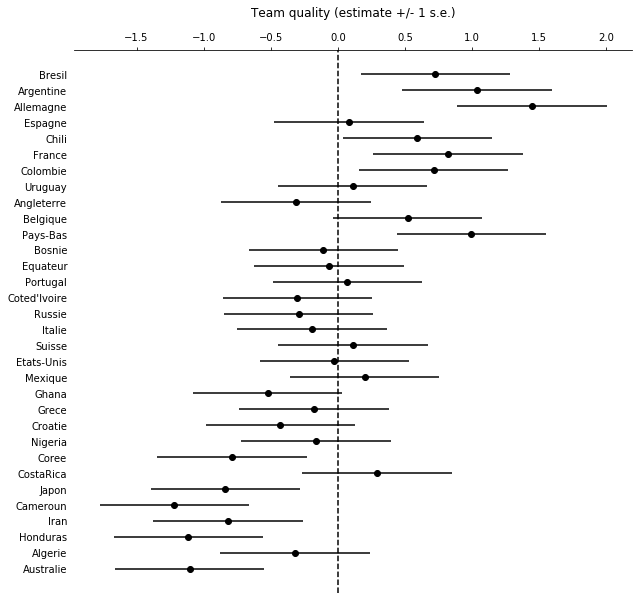

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))# ax.axis('off')

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=sigma_a, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)